In [1]:
# This notebook uses py2.7 - because that's what FOOF is written in
from __future__ import print_function, division

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import RANSACRegressor

In [3]:
# Import custom
from slf.plts.psd import *
from slf.core.utils import *
from slf.fit import *

In [4]:
# Load data from Jorge (Chicage group doing slope fitting)
dat = np.load('../data/data-for-tom.npy').item()

In [5]:
# Get freqs & unembed from being an array of arrays
freqs = dat['f']
freqs = np.array([f[0] for f in freqs])

In [6]:
# Set available subject numbers
subnums = [0, 71, 15, 22, 94, 31]
n_chans = 68

In [7]:
# Check subject details
for subj in subnums:
    print('Subj ', str(subj), '\t', dat[subj]['group'], '\t', dat[subj]['age'], )
# Note: I think group & age values are switched

Subj  0 	 29 	 DANE
Subj  71 	 64 	 MCI
Subj  15 	 44 	 DANE
Subj  22 	 24 	 DANE
Subj  94 	 74 	 MCI_Control
Subj  31 	 25 	 DANE


In [8]:
#fn = fsl_ransac_oscs
slvs_al = dict()
slvs_os = dict()

for subj in subnums:
    
    #slvs[subj] = np.zeros([n_chans])
    slvs_al[subj] = []
    slvs_os[subj] = []
    
    for ch in range(64, 69):
    #for ch in range(n_chans):
    
        psd_ext, freqs_ext = extract_psd(dat[subj][ch]['eyeso'], freqs, 3, 30)
        #slvs[subj][ch] = fn(freqs_ext, psd_ext)
        #slvs[subj].append(fn(freqs_ext, psd_ext))
        
        slvs_al[subj].append(fsl_ransac_alph(freqs_ext, psd_ext))
        slvs_os[subj].append(fsl_ransac_oscs(freqs_ext, psd_ext))

In [9]:
# Get subj ages
ages = [dat[subj]['group'] for subj in subnums]
print(ages)

[29, 64, 44, 24, 74, 25]


In [10]:
# Get group channel names (& clean up unicode)
gr_chans = dat[0]['channels'][64:69]
gr_chans = [str(it) for it in gr_chans]
print(gr_chans)

['FRONTAL', 'LTEMPORAL', 'CENTRAL', 'RTEMPORAL', 'OCCIPITAL']


In [11]:
# Set inds
fr_ind = 0
ce_ind = 2
oc_ind = 4

# Grab slope vals from group electrodes
#frs = [slvs[subj][0] for subj in subnums]
#cen = [slvs[subj][2] for subj in subnums]
#occ = [slvs[subj][4] for subj in subnums]

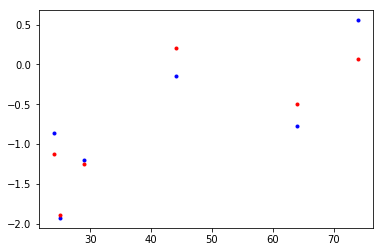

In [12]:
# Plot frontal
f = plt.figure()
plt.plot(ages, [slvs_al[subj][fr_ind] for subj in subnums], 'b.')
plt.plot(ages, [slvs_os[subj][fr_ind] for subj in subnums], 'r.')

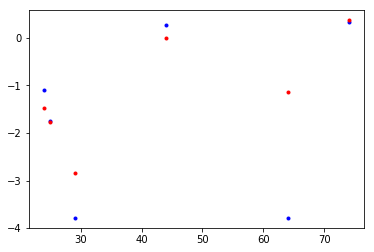

In [13]:
# Plot central
f = plt.figure()
plt.plot(ages, [slvs_al[subj][ce_ind] for subj in subnums], 'b.')
plt.plot(ages, [slvs_os[subj][ce_ind] for subj in subnums], 'r.')

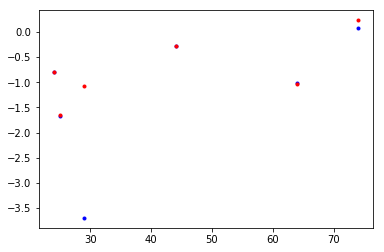

In [14]:
# Plot posterior
f = plt.figure()
plt.plot(ages, [slvs_al[subj][oc_ind] for subj in subnums], 'b.')
plt.plot(ages, [slvs_os[subj][oc_ind] for subj in subnums], 'r.')

In [114]:
# Check how the correlation compares between methods

from scipy.stats import pearsonr

print('RAN-ALPH', pearsonr(ages, [slvs_al[subj][oc_ind] for subj in subnums]))
print('RAN-OSCS', pearsonr(ages, [slvs_os[subj][oc_ind] for subj in subnums]))

RAN-ALPH (0.55629191539004841, 0.25163736833036426)
RAN-OSCS (0.66434305773228397, 0.1500898818125139)


In [110]:
# Quick Viz to check fits when methods diverge
ss = 71
cc = 2

psd_ext, freqs_ext = extract_psd(dat[ss][cc]['eyeso'], freqs, 3, 30)

# Note: intercepts are set manually for viz - they don't really matter here
sl_fit_al = slvs_al[ss][cc] * np.log10(freqs_ext) + 2.1
sl_fit_os = slvs_os[ss][cc] * np.log10(freqs_ext) + 0.6

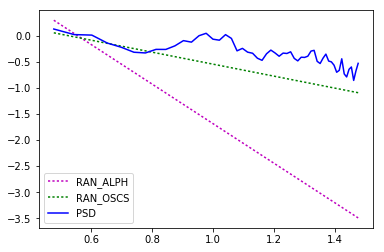

In [111]:
f = plt.figure()
plt.plot(np.log10(freqs_ext), sl_fit_al, ':m', label='RAN_ALPH')
plt.plot(np.log10(freqs_ext), sl_fit_os, ':g', label='RAN_OSCS')
plt.plot(np.log10(freqs_ext), np.log10(psd_ext), 'b', label='PSD')
plt.legend()

In [ ]:
# Compare eyes open / eyes closed: single subject, single channel
ss = 0
cc = 68
plt_psd_2(freqs, dat[ss][cc]['eyeso'], freqs, dat[ss][cc]['eyesc'])